# **Week 7: Parameter Estimation Methods**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

Through various exercises, the first part of this workshop will review two common point estimation methods: the method of moments and maximum likelihood estimation. In the second part, we will focus on interval estimation using the asymptotic distribution of sample means.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [2]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [3]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🥇


## **Point Estimation**

We have studied point estimation before, where our goal was to estimate population parameters such as the mean ($\mu$) and variance ($\sigma^2$). In those cases, we used the **sample mean** ($\bar{x}$)  and **sample variance** ($s^2$) as our estimators. Each of these provides a single number from the data that serves as our “best guess” for the true population parameter.

- If the population mean is $\mu$, then the sample mean $\bar{x}$ is our point estimate.
- If the population variance is $\sigma^2$, then the sample variance $s^2$ is our point estimate.

These estimators also have desirable properties: they are unbiased — ***on average***, they hit the true parameter; and they become increasingly "accurate" as the sample size grows.




More generally, we consider the situation where the sample data $\{x_1, \dots, x_n\}$ are generated according to a **statistical model** with probability distribution  

$$
f(\{x_1, \dots, x_n\} \mid \theta),
$$

where $\theta$ represents one or more unknown parameters of interest. Given the observed data, our goal is to construct an estimator $\hat{\theta}$ that provides a single “best guess” for the true value of $\theta$.  

Often, we assume that the data $\{x_1, \dots, x_n\}$ are realisations of i.i.d. random variables with probability function $p(x \mid \theta)$. In that case, the joint probability can be written as  

$$
f(\{x_1, \dots, x_n\} \mid \theta) = \prod_{i=1}^{n} p(x_i \mid \theta).
$$  

Note that, **pre-sample** (i.e. before observing any data), like sample mean and sample variance, $\hat{\theta}$ is also a random variable as it is a function of random variables (sample data). The point estimate computed after observing the sample data is a realisation of this random variable. Although we have explored the sampling distribution of sample staistics such as the sample mean, details about the sampling distribution of $\hat{\theta}$ generally are beyond the scope of this unit.


In this section, we will introduce two fundamental methods for constructing such estimators: the **method of moments (MoM)** and **maximum likelihood estimation (MLE)**. Both methods start from the same observed data but approach the estimation problem in different ways. Our main focus will be on understanding how these methods are formulated and applied in practice.

**Note:** All estimation techniques we learn in this unit assume that the data are generated from a particular statistical model. In practice, this assumption might not strictly hold. Often, we have several competing models, and we need to estimate parameters for each model before selecting the best one. Learning to estimate model paramaeters is therefore an essential first step in a broader modelling workflow.

### **Method of Moments**

The method of moments is a simple way to construct estimators by equating sample moments with theoretical moments. Suppose our model has an unknown parameter $\theta$, and let $m_k(\theta)$ denote the $k$-th population moment:

$$
m_k(\theta) = \mathbb{E}[X^k].
$$

From a sample $x_1, \dots, x_n$, we can compute the corresponding sample moments:

$$
\hat{m}_k = \frac{1}{n} \sum_{i=1}^{n} x_i^k.
$$

The idea of MoM is to solve the system of equations

$$
\hat{m}_k = m_k(\theta), \quad k = 1, 2, \dots
$$

for the unknown parameter(s) $\theta$. The solution gives the method of moments estimator $\hat{\theta}_{\text{MoM}}$.  In general, for a model with $k$ parameters, we need to solve $k$ equations.

MoM is intuitive and easy to compute. However, it may produce nonsensical values (e.g., negative estimates for parameters that must be positive) if the sample moments deviate strongly from theoretical constraints.


### **Maximum Likelihood Estimation**

Maximum likelihood estimation takes a different approach. Suppose the sample $x_1, \dots, x_n$ are realisations from i.i.d. random variables with probability function $p(x \mid \theta)$. The **likelihood function** is

$$
L(\theta) = \prod_{i=1}^{n} p(x_i \mid \theta),
$$

which we can also write in log form as

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^{n} \log p(x_i \mid \theta).
$$


Note that the likelihood function is a function of the model parameter $\theta$, while the sample data $\{x_1, \dots, x_n\}$ are fixed. It represents how plausible the observed data are for each possible value of $\theta$.


The maximum likelihood estimator $\hat{\theta}_{\text{MLE}}$ is defined as the value of $\theta$ that maximises the likelihood function:

$$
\hat{\theta}_{\text{MLE}} = \arg \max_{\theta} L(\theta) = \arg \max_{\theta} \ell(\theta).
$$




In practice, we often optimise the log-likelihood function instead of the likelihood function, even though they are equivalent. This is because the log-likelihood is a sum rather than a product, making its derivatives easier to compute.

MLE has many desirable properties in large samples (beyond the scope of this unit). In many scenarios, MLE and MoM result in the same estimator. However, unlike MoM, it always respects the constraints of the parameter space as we optimise for $\theta$ over its parameter space. The main drawback is that computing $\hat{\theta}_{\text{MLE}}$ can sometimes require solving nonlinear equations or numerical optimisation. Here, however, we will primarily focus on models for which the maximum likelihood estimator, $\hat{\theta}_{\text{MLE}}$, can be derived analytically.

### **"All models are wrong, but some are more useful"**

- **True model class:** The actual distribution generating the data (usually unknown, could be complex).  
- **Approximation model class:** The set of models you choose to fit (e.g., Gaussian, linear regression).  
- **Estimation:** Finds the best-fitting model **within the approximation class** according to some criteria (e.g., MoM, MLE, ⋯), but if the class does not contain the true model, there is still some error (model mis-specification), which could be large or small.


### **Exercise**

A factory produces light bulbs. Each bulb has a probability $p$ of being defective. A quality inspector takes a sample of 10 bulbs at random from the production line, and records the number of defective bulbs. The number of defective bulbs in $m=10$ such independent samples (each sample consisting of $n = 10$ bulbs) is recorded as follows:

$$
\{2, 1, 0, 3, 1, 2, 1, 0, 2, 1\}
$$

Assume that the number of defective bulbs in each sample follows `Binomial(n,p)`.  

- Use the MoM and MLE to estimate the probability $p$ of a defective bulb.
- Comment on the results

In [1]:
smpl_data = c(2,1,0,3,1,2,1,0,2,1)



<details>
<summary>▶️ Click to show the MoM solution</summary>

**Method of Moments**.
  
For $X \sim \text{Binomial}(n=10, p)$, the first theoretical moment is :

$$
\begin{align}
m_1 = \mathbb{E}[X] = np.
\end{align}
$$

From the sample $x_1, \dots, x_{m}$, we compute the corresponding sample moment:

$$
\begin{align}
\hat{m}_1 &= \frac{\sum_{i=1}^m x_i}{m}.
\end{align}
$$

Equating the first theoretical and sample moments gives us:

$$\hat{p} = \frac{\hat{m}_1}{n} = 0.13.$$


```r
smpl_data = c(2,1,0,3,1,2,1,0,2,1)
mean(smpl_data)/10
```

</details>






<details>
<summary>▶️ Click to show the MLE solution</summary>
**Maximum Likelihood Estimation**
$$
\begin{align}
L(p) &= \prod_{i=1}^{m} \binom{n}{x_i} p^{x_i}(1-p)^{n-x_i} \\
&= \prod_{i=1}^{m} \binom{n}{x_i} \prod_{i=1}^{m} p^{x_i}\prod_{i=1}^{m} (1-p)^{n-x_i} \\
&= \binom{n}{x_i}^m p^{\sum_{i=1}^{m}  x_i}(1-p)^{\sum_{i=1}^{m} (n-x_i)} \\
\implies \ell(p) &= m\log\binom{n}{x_i} + \sum_{i=1}^m x_i\log p + \Big(nm - \sum_{i=1}^m x_i\Big)\log(1-p). \\
\implies \frac{d\ell}{dp} &= \frac{\sum_{i=1}^m x_i}{p} - \frac{nm - \sum_{i=1}^m x_i}{1-p}.
\end{align}
$$
Setting the first derivative to 0:
$$
\begin{align}
\frac{d\ell}{dp} &= \frac{\sum_{i=1}^m x_i}{p} - \frac{nm - \sum_{i=1}^m x_i}{1-p} = 0 \\[6pt]
\implies \frac{\sum_{i=1}^m x_i}{p} &= \frac{nm - \sum_{i=1}^m x_i}{1-p} \\[6pt]
\implies (1-p) \sum_{i=1}^m x_i &= p\big(nm -  \sum_{i=1}^m x_i\big) \\[6pt]
\implies \sum_{i=1}^m x_i - p\sum_{i=1}^m x_i &= pnm - p \sum_{i=1}^m x_i \\[6pt]
\implies  \sum_{i=1}^m x_i &= pnm \\[6pt]
\implies \hat p &= \frac{\sum_{i=1}^m x_i}{nm}.
\end{align}
$$


$$
\sum_{i=1}^m x_i = 13 \;\;\implies\;\; \hat{p} = \frac{13}{100} = 0.13.
$$

Technically, after finding the MLE by setting the first derivative to zero, we should check the second derivative at the estimated value to ensure it is negative, which confirms that the solution is indeed a maximum (not a minimum or a saddle point).

$$
\begin{align}
\frac{d^2 \ell}{dp^2} &= -\frac{\sum_{i=1}^m x_i}{p^2} - \frac{nm - \sum_{i=1}^m x_i}{(1-p)^2}.
\end{align}
$$

Evaluated at $\hat{p}$:
$$
\left.\frac{d^2\ell}{dp^2}\right|_{\hat{p}} = -\frac{\sum_{i=1}^m x_i}{\hat{p}^2} - \frac{nm - \sum_{i=1}^m x_i}{(1-\hat{p})^2} \approx -884.173 < 0,
$$
which confirms a maximum.

```r
smpl_data = c(2,1,0,3,1,2,1,0,2,1)
n = 10  
m = length(smpl_data)

# MLE estimate of p
p_hat <- sum(smpl_data) / (n * m)
p_hat

# Second derivative of log-likelihood at MLE
second_derivative = -sum(smpl_data)/p_hat^2 - (n*m - sum(smpl_data))/(1 - p_hat)^2
second_derivative #-884.173 < 0
```

</details>




## **Interval Estimation**


In many scenarios, we are interested in creating an interval that hopefully captures the parameter’s true value instead of obtaining a single point estimate:

$$\Big[T_1\big(\{x_1,...,x_n\}\big), T_2\big(\{x_1,...,x_n\}\big)\Big].$$

A common rule option $1−\alpha$ confidence interval, which aims to find functions $T_1$ and $T_2$ such that:

$$\Pr\Big(T_1\big(\{x_1,...,x_n\}\big) \leq \theta \leq T_2\big(\{x_1,...,x_n\}\big)\Big) = 1 - \alpha.$$

Conventionally, $\alpha = 0.05$ (95% confidence interval). Other common options include $\alpha = 0.01$ and $\alpha = 0.1$.


Note that, **pre-sample**, the upper and lower bounds of a confidence interval are random variables. This is why the previous equation is mathematically valid. The upper and lower bound estimates computed after observing the sample data are realisations of these random variables.

Here, we mostly focus on confidence intervals for population mean and difference between two population means using asymptotic sampling distribution of the sample mean. Small-sample confidence interval (i.e., not relying on asymptotic properties) will be covered in the next workshops. Confidence intervals for more general estimators (like MLE) are beyond the scope of the unit.

### **Asymptotic Confidence Interval for Population Mean**

Recall that, for i.i.d. sample of size $n$ drawn from any probability distribution with mean $\mu$ and variance $\sigma^2$, if $n$ is large enough,
$$
\begin{align}
&\quad\quad\;\,\,\displaystyle \bar{x} \approx \mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big);\\
&\implies  \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \approx \mathcal{N}(0,1); \\
&\implies \Pr\Big(z_{\alpha/2} \leq \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \leq z_{1-\alpha/2}\Big) \approx 1 - \alpha;\\
&\implies \Pr\Big(\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}\Big) \approx 1 - \alpha\\
&\implies \Pr\Big(\bar{x} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}\Big) \approx 1 - \alpha.
\end{align}
$$  

Here, $z_{\alpha/2}$ and $z_{1-\alpha/2}$ are $\alpha/2$ and $1-\alpha/2$ quantiles of the standard Gaussian distribution $\mathcal{N}(0,1)$. As the standard Gaussian PDF is symmetric around 0, $z_{\alpha/2} = -z_{1-\alpha/2}$.






**Note that our notation is a bit different from the notation used in pre-lecture reading**. Here, $z_{1-\alpha}$ is used to denote the $1-\alpha$ quantile (lower-tail notation), while it is $z_{\alpha}$ in the pre-lecture reading (upper-tail notation).

[1] -1.959964

[1] 1.959964

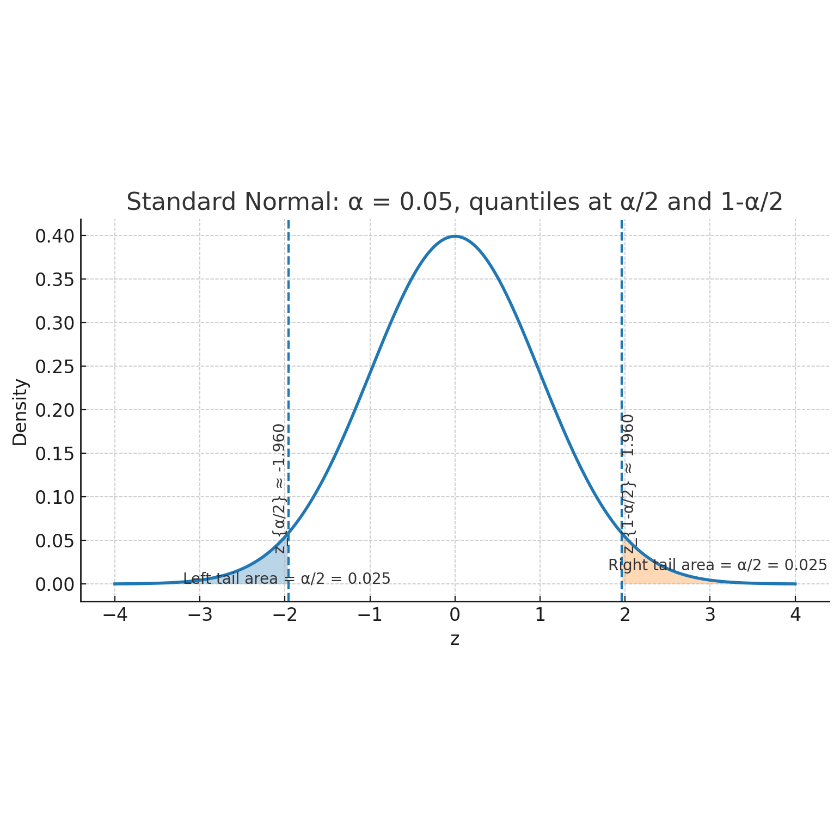

In [16]:
qnorm(0.025)
qnorm(1 - 0.025)
img = readPNG("figures/z_95int.png")
grid.newpage()
vp = viewport()
pushViewport(vp)
grid.raster(img)
popViewport()

An asymptotically valid confidence interval for population mean can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}.
\end{align}
$$

Confidence intervals constructed following this rule are symmetric around sample means.

A $95\%$ symmetric confidence interval can be constructed by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{0.975}\frac{\sigma}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.975}\frac{\sigma}{\sqrt{n}}.
\end{align}
$$

Of course, one can construct an annoying asymmetrical confidence interval like this:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.01}\frac{\sigma}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.96}\frac{\sigma}{\sqrt{n}};
\end{align}
$$

Or an annoying $61\%$ symmetric confidence interval (we might be the first ones to use a $61\%$ confidence interval):

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.195}\frac{\sigma}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{0.805}\frac{\sigma}{\sqrt{n}}
\end{align}
$$

If data are generated from i.i.d. Gaussians, these $1-\alpha$ confidence intervals are **ALWAYS** valid regardless of the sample size (since the sample mean will be exactly normally distributed in this case).



In practice, the standard deviation $\sigma$ (or equivalently, the variance $\sigma^2$) is usually unknown. However, we can replace $\sigma$ by the sample standard deviation estimate $s$. This is a plug-in estimator.

> A plug-in estimator is obtained by taking a formula that involves an unknown parameter and plugging in an estimate of that parameter (usually computed from data).

Here, for instance, we can replace the unknown $\sigma$ with $s = \sqrt{s^2}$ (the unbiased/usual sample variance).

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{1-\alpha/2}\frac{s}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{1-\alpha/2}\frac{s}{\sqrt{n}}.
\end{align}
$$

#### **Asymptotic Confidence Interval for Population Proportion**

If $n$ is sufficiently large,

$$
\displaystyle \hat{p} \approx \mathcal{N}\Big(p, \frac{p(1-p)}{n}\Big).
$$  

Therefore, we can obtain a similar asymptotic symmetric $(1-\alpha)$ confidence interval for population proportion $p$ by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \hat{p} - z_{1-\alpha/2}\sqrt{\frac{p(1-p)}{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \hat{p} + z_{1-\alpha/2}\sqrt{\frac{p(1-p)}{n}}.
\end{align}
$$





In practice, $p$ is unknown. However, we can replace $p$ with its estimator $\hat{p}$:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \hat{p} - z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \hat{p} + z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
\end{align}
$$

#### **Finding Quantiles**

You can find quantiles of the standard Gaussian distribution in a $Z$ statistical table.

In [17]:
generateZTable()



|     |   0.00|   0.01|   0.02|   0.03|   0.04|   0.05|   0.06|   0.07|   0.08|   0.09|
|:----|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|-3.4 | 0.0003| 0.0003| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0004| 0.0005| 0.0005|
|-3.3 | 0.0005| 0.0005| 0.0005| 0.0005| 0.0006| 0.0006| 0.0006| 0.0006| 0.0006| 0.0007|
|-3.2 | 0.0007| 0.0007| 0.0007| 0.0008| 0.0008| 0.0008| 0.0008| 0.0009| 0.0009| 0.0009|
|-3.1 | 0.0010| 0.0010| 0.0010| 0.0011| 0.0011| 0.0011| 0.0012| 0.0012| 0.0013| 0.0013|
|-3.0 | 0.0013| 0.0014| 0.0014| 0.0015| 0.0015| 0.0016| 0.0016| 0.0017| 0.0018| 0.0018|
|-2.9 | 0.0019| 0.0019| 0.0020| 0.0021| 0.0021| 0.0022| 0.0023| 0.0023| 0.0024| 0.0025|
|-2.8 | 0.0026| 0.0026| 0.0027| 0.0028| 0.0029| 0.0030| 0.0031| 0.0032| 0.0033| 0.0034|
|-2.7 | 0.0035| 0.0036| 0.0037| 0.0038| 0.0039| 0.0040| 0.0041| 0.0043| 0.0044| 0.0045|
|-2.6 | 0.0047| 0.0048| 0.0049| 0.0051| 0.0052| 0.0054| 0.0055| 0.0057| 0.0059| 0.0060|
|-2.5 | 0.0062| 0.0064| 0.0066

#### **Examples**



##### **Example 1**

The following sample are generated from i.i.d. random variables with unknown mean $\mu$ and variance $\sigma^2 = 1$.

$$\{0.13, 0.68, 0.26, 0.97, 1.2, 0.74, 0.42, 0.2, 2.13, 0.06, 1.18, 0.25, 3.12, 4.16, 2.05, 0.21, 2.14,2,0.85,0.07,0.04,0.77,0.3,0.53,0.3,0.82,0.53,0.08,0.22,0.14,0.17,0.81,0.29,0.57,0.08,0.2,1.94,3.34,2.09,0.95,0.44\}$$

Compute a $90\%$ symmetric confidence interval estimate for $\mu$ using the asymptotic distribution of $\bar{x}$ using
- The true variance
- The estimated variance

Comment on the results.

In [18]:
smpl_data = c(0.13, 0.68, 0.26, 0.97, 1.2, 0.74, 0.42, 0.2, 2.13, 0.06, 1.18, 0.25, 3.12, 4.16, 2.05, 0.21, 2.14,2,0.85,0.07,0.04,0.77,0.3,0.53,0.3,0.82,0.53,0.08,0.22,0.14,0.17,0.81,0.29,0.57,0.08,0.2,1.94,3.34,2.09,0.95,0.44)

x_bar = mean(smpl_data)
print("x_bar")
x_bar

z_95 = qnorm(0.95)
print("z_95")
z_95

sigma = 1

s = sd(smpl_data)
print("s")
s

print("n")
n = length(smpl_data)
n

#Known sigma
print("Known sigma")
lower = x_bar - z_95*sigma/sqrt(n)
upper = x_bar + z_95*sigma/sqrt(n)
lower; upper

#Plug-in
print("Plug-in")
lower = x_bar - z_95*s/sqrt(n)
upper = x_bar + z_95*s/sqrt(n)
lower; upper


[1] "x_bar"


[1] 0.9129268

[1] "z_95"


[1] 1.644854

[1] "s"


[1] 0.9964543

[1] "n"


[1] 41

[1] "Known sigma"


[1] 0.6560439

[1] 1.16981

[1] "Plug-in"


[1] 0.6569547

[1] 1.168899

A confidence interval for population mean can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}.
\end{align}
$$

Here,

$$
\begin{align}
\bar{x} &\approx 0.9129;\\
s &= 0.9965;\\
\sigma &= 1.0000;\\
n &= 41;\\
z_{0.95} &\approx 1.6449.\\
\end{align}
$$

Given known $\sigma^2$, at the 95% confidence level, a plausible range for $\mu$ is:

$$[0.6560, 1.1698].$$


We could also replace $\sigma$ with its estimator $s$:
$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \bar{x} - z_{1-\alpha/2}\frac{s}{\sqrt{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \bar{x} + z_{1-\alpha/2}\frac{s}{\sqrt{n}}.
\end{align}
$$


Given unknown $\sigma^2$, at the 95% confidence level, a plausible range for $\mu$ is:

$$[0.6570,1.1689].$$

These confidence interval estimates are quite similar.



##### **Example 2**

A survey was conducted among 200 university students to see how many of them regularly drink coffee before lectures. Out of the 200 students, 128 said "yes".

Assuming a suitable statistical model, construct a symmetric 95% confidence interval for the true population proportion $p$ using the asymptotic normal approximation.

In [3]:
print("p_hat")
p_hat = 128/200
p_hat

z_975 = qnorm(0.975)
print("z_975")
z_975

n = 200

print("Plug-in CI")
lower = p_hat - z_975*sqrt(p_hat*(1-p_hat)/n)
upper = p_hat + z_975*sqrt(p_hat*(1-p_hat)/n)
lower;upper


[1] "p_hat"


[1] 0.64

[1] "z_975"


[1] 1.959964

[1] "Plug-in CI"


[1] 0.5734766

[1] 0.7065234

Assume that the responses of the 200 students, $x_1, \dots, x_{200}$, take values 1 ("yes") or 0 ("no") and are i.i.d. `Bernoulli(p)` (Equivalently, the total number of "yes" responses follows a `Binomial(200, p)` distribution).

A plug-in confidence interval for $p$ can be constructed by choosing:

$$
\begin{align}
T_1\big(\{x_1,...,x_n\}\big) &= \hat{p} - z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}};\\
T_2\big(\{x_1,...,x_n\}\big) &= \hat{p} + z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
\end{align}
$$

Here,

$$
\begin{align}
\hat{p} &\approx 0.64;\\
n &= 200;\\
z_{0.975} &\approx 1.9600.
\end{align}
$$

At the 95% confidence level, a plausible range for $p$ is:

$$[0.5734; 0.7065]$$



### **Confidence Interval for The Difference Between Two Population Means**

In addition to estimating population means, often we are interested in the difference between the population means $\mu_1$ and $\mu_2$ of two **independent** populations $f_1(x)$ and $f_2(x)$.

It is reasonable (and correct) to assume that the best estimate of the difference between population means $\mu_1 - \mu_2$ is the difference between the sample means $\bar{x}_1 - \bar{x}_2$. The question is then, what is the sampling distribution of $\bar{x}_1 - \bar{x}_2$?

Given $\{x_{11},...,x_{1n_1}\}$ and $\{x_{21},...,x_{2n_2}\}$ generated from i.i.d. probability distributions $f_1(x)$ and $f_2(x)$ with mean $\mu_1$ and $\mu_2$ and variance $\sigma^2_1$ and $\sigma^2_2$, respectively. If $n_1$ and $n_2$ are sufficiently large:

$$\bar{x}_1 - \bar{x}_2 \approx \mathcal{N}\Bigg(\mu_1 - \mu_2, \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}\Bigg)$$


If $f_1(x)$ and $f_2(x)$ are Gaussians, this is the exact sampling distribution of $\bar{x}_1 - \bar{x}_2$ regardless of the sample size.

A symmetric confidence interval for $\mu_1 - \mu_2$ can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\bar{x}_1 - \bar{x}_2) - z_{1-\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}};\\
T_2\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\bar{x}_1 - \bar{x}_2) + z_{1-\alpha/2}\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}.
\end{align}
$$


A plug-in symmetric confidence interval for $\mu_1 - \mu_2$ can be obtained by choosing:


$$
\begin{align}
T_1\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\bar{x}_1 - \bar{x}_2) - z_{1-\alpha/2}\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}};\\
T_2\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\bar{x}_1 - \bar{x}_2) + z_{1-\alpha/2}\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}},
\end{align}
$$

where $s_1^2$ and $s_2^2$ are sample variances of samples 1 and 2, respectively.




#### **Confidence Interval for The Difference Between Two Population Proportions**

Given $\{x_{11},...,x_{1n_1}\}$ and $\{x_{21},...,x_{2n_2}\}$ generated from i.i.d. `Bernoulli(p1)` and `Bernoulli(p2)`, respectively. If $n_1$ and $n_2$ are sufficiently large:

$$\hat{p}_1 - \hat{p}_2 \approx \mathcal{N}\Bigg(p_1 - p_2, \frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}\Bigg)$$

A symmetric confidence interval for $p_1 - p_2$ can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\hat{p}_1 - \hat{p}_2) - z_{1-\alpha/2}\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}};\\
T_2\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\hat{p}_1 - \hat{p}_2) + z_{1-\alpha/2}\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}.
\end{align}
$$

A plug-in symmetric confidence interval for $p_1 - p_2$ can be obtained by choosing:

$$
\begin{align}
T_1\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\hat{p}_1 - \hat{p}_2) - z_{1-\alpha/2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}};\\
T_2\big(\{x_{11},...,x_{1n_1}, x_{21},...,x_{2n_1}\}\big) &= (\hat{p}_1 - \hat{p}_2) + z_{1-\alpha/2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}.
\end{align}
$$







#### **Example**

A coffee shop wants to compare customer preferences between two types of coffee (A and B) when used in cappuccinos. To test this, they randomly assign customers to try cappuccinos made with either coffee A or coffee B.
A total of 200 customers participate: 80 in group A and 120 in group B.
- In group A, 61 customers say they like the cappuccino.
- In group B, 97 customers say they like the cappuccino.


Using a suitable statistical model, construct a 90% symmetric confidence interval for the difference in population proportions of customers who like coffee A versus coffee B based on the asymptotic normal approximation.

In [4]:
nA = 80
nB = 120
pA_hat = 61/nA
pB_hat = 97/nB
print("pA_hat; pB_hat")
pA_hat; pB_hat

z_95 = qnorm(0.95)
print("z_95")
z_95

print("Plug-in CI")
p_diff = pA_hat - pB_hat
lower = p_diff - z_95*sqrt( pA_hat*(1-pA_hat)/nA  + pB_hat*(1-pB_hat)/nB)
upper = p_diff + z_95*sqrt( pA_hat*(1-pA_hat)/nA  + pB_hat*(1-pB_hat)/nB)
lower; upper

[1] "pA_hat; pB_hat"


[1] 0.7625

[1] 0.8083333

[1] "z_95"


[1] 1.644854

[1] "Plug-in CI"


[1] -0.1439025

[1] 0.05223581

A plug-in symmetric confidence interval for $p_1 - p_2$ can be obtained by choosing:
$$
\begin{aligned}
T_1 &= (\hat{p}_1 - \hat{p}_2) - z_{1-\alpha/2}\sqrt{\frac{\hat p_1(1-\hat p_1)}{n_1} + \frac{\hat p_2(1-\hat p_2)}{n_2}},\\
T_2 &= (\hat{p}_1 - \hat{p}_2) + z_{1-\alpha/2}\sqrt{\frac{\hat p_1(1-\hat p_1)}{n_1} + \frac{\hat p_2(1-\hat p_2)}{n_2}}.
\end{aligned}
$$


Here,

$$
\begin{align}
\hat{p}_A &= 0.7625;\\
\hat{p}_B &\approx 0.8083;\\
n_A &= 80;\\
n_B &= 120;\\
z_{0.95} &\approx 1.6449.\\
\end{align}
$$

At the 95% confidence level, a plausible range for $p$ is:

$$[-0.1439, 0.0522]$$

### **Making Sense of Confidence Intervals**

Confidence intervals are often misunderstood. Let’s take a simple example:

Suppose human heights are generated from a distribution with mean $\mu$ and variance $\sigma^2$. Given a sufficiently large sample, we can use the asymptotic approximation for the sampling distribution of the sample mean. Suppose we compute a 95% confidence interval for $\mu$ to be [170, 190]. How should we interpret this?

- **Incorrect interpretation #1**

> The probability that the true mean $\mu$ lies in [170, 190] is 95%.


This is wrong because $\mu$ is a fixed (but unknown) parameter, not a random variable. It is either in the interval or not, so its probability of lying inside the interval is 0 or 1.

- **Incorrect interpretation #2**

> We are 95% confident that [170, 190] contains the true mean $\mu$.

This is misleading because “95% confident” has no formal mathematical meaning. It suggests subjectivity rather than a precise probability statement.

- **Correct interpretation**

Before observing the data, the probability that the confidence interval contains $\mu$ is 0.95. In other words, if we were to repeat the sampling process many times and construct a confidence interval from each sample, about 95% of those intervals would contain the true mean.

A confidence interval estimate such as $[170,190]$ has no probabilistic interpretation once observed; however, it is still useful because it is constructed from a procedure that, with high probability (e.g., 95%), produces intervals covering the true parameter.

As an example, suppose we draw samples of size 10 from an i.i.d. distribution $\mathcal{N}(2, 1.5^2)$. In this setting, the true variance $\sigma^2 = 1.5^2$ is known, but the true mean $\mu = 2$ is unknown to us. In each iteration, we take a sample of 10 observations from $\mathcal{N}(2, 1.5^2)$, construct a 95% symmetric confidence interval for $\mu$, and then check whether the interval contains the true value.

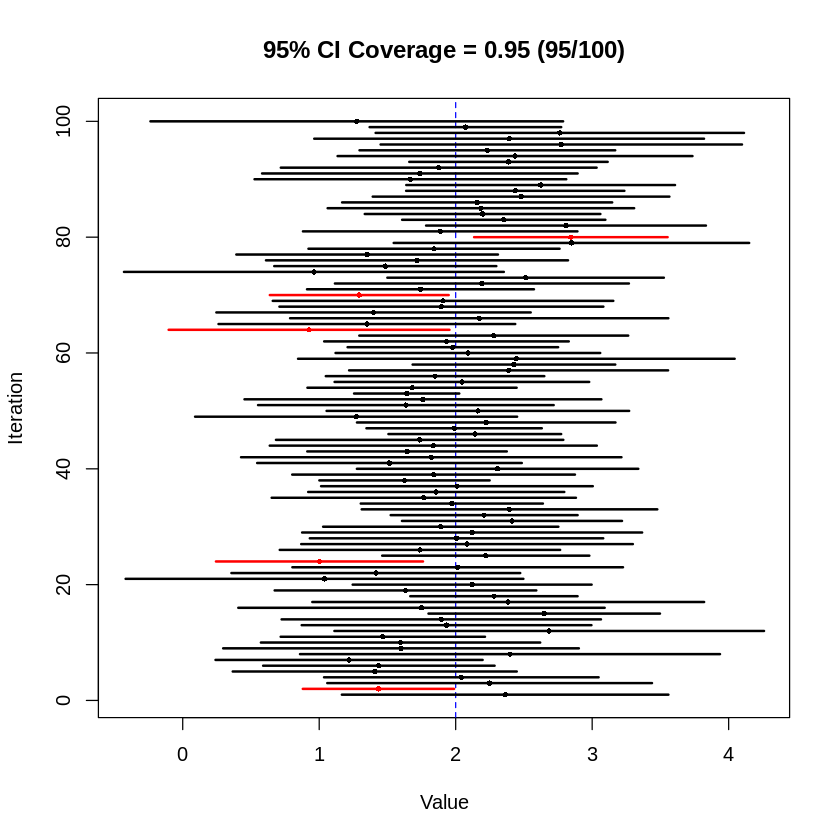

In [5]:
# Run this a few times
CI_visualiser()

### **Workshop Questions**

#### **Question 1**

The following code cell loads daily returns of `S&P 500` index from `03/01/2000` to `18/07/2025` from `s&p500.csv`, queried from Yahoo Finance.

In [6]:
sp500_daily.returns = read.csv("datasets/s&p500.csv")
sp500_daily.returns %>% str()

'data.frame':	6424 obs. of  1 variable:
 $ daily.returns: num  0 -0.038345 0.001922 0.000956 0.02709 ...


##### **Question 1.1**

Assuming that daily returns $x_1,...,x_{6424}$ were generated from i.i.d. $\mathcal{N}(\mu, \sigma^2)$, derive the MoM estimators for $\mu$ and $\sigma^2$. Comment on the results.

Given a sample of $x_1,...,x_{6424}$ from a population of i.i.d. $\mathcal{N}(\mu, \sigma^2)$, we know the E[x] = $\mu$ and the Var[x] = $\sigma^2$
The method of moments describe one moment $m_1 = \frac{\sum_{i=1}^{n}x_i}{n}$

Mean descibed in method of moments

E[X] = $m_1$

$\frac{\sum_{i=1}^{n}x_i}{n}$ = $\mu$

Variance described in method of moments

Var[X] = $E[X^2] - E[X]^2$
Var[X] = $m_2 - m_1^2$

$m_2 - m_1^2$ = $\sigma^2$

$\frac{\sum_{i=1}^{n}x_i^2}{n} - (\frac{\sum_{i=1}^{n}x_i}{n})^2$ = $\sigma^2$


<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>

##### **Question 1.2**

Use R to compute the MoM estimates of $\mu$ and $\sigma^2$.

In [37]:
moment1 = mean(sp500_daily.returns$daily.returns)
moment2 = mean((sp500_daily.returns$daily.returns^2))

meanEstimate = moment1
varEstimate = moment2 - moment1^2

print("Mean Estimate")
meanEstimate

print("VarianceEstimate")
varEstimate

[1] "Mean Estimate"


[1] 0.0003034557

[1] "VarianceEstimate"


[1] 0.0001505491


<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>

##### **Question 1.3**
What are the 0.0005 and 0.9995 empirical quantiles of daily returns, and what is the probability of observing a return at least as extreme as these quantile values under the MoM fitted distribution. Comment on the results.

In [40]:
# Using quantile to find empirical quantile from dataset
q9995 = quantile(sp500_daily.returns$daily.returns, probs = 0.9995)
q0005 = quantile(sp500_daily.returns$daily.returns, probs = 0.0005)

Pr_largerthanq9995 = pnorm(q = q9995, mean = meanEstimate, sd = sqrt(varEstimate), lower.tail = FALSE)
Pr_smallerthanq0005 = pnorm(q = q0005, mean = meanEstimate, sd = sqrt(varEstimate), lower.tail = TRUE)

q0005
q9995
Pr_largerthanq9995
Pr_smallerthanq0005

0.05% 
-0.08903563

99.95% 
0.09362544

99.95% 
1.415724e-14

0.05% 
1.654415e-13


<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>

##### **Question 1.4**
Use qqplots to verify whether or not the Gaussian assumption is adequate.

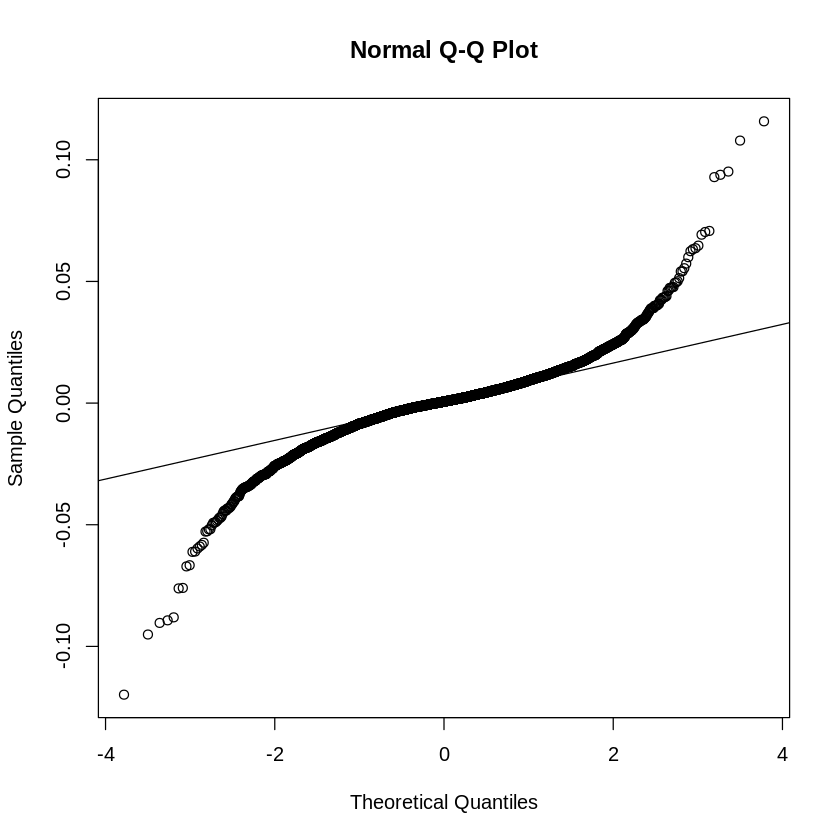

In [44]:
qqnorm(sp500_daily.returns$daily.returns)
qqline(sp500_daily.returns$daily.returns)


<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>

##### **Question 1.5**

Modify the following code cell to overlay the density of the MoM-fitted Gaussian distribution on the (normalised) histogram of daily returns. Comment on the results.

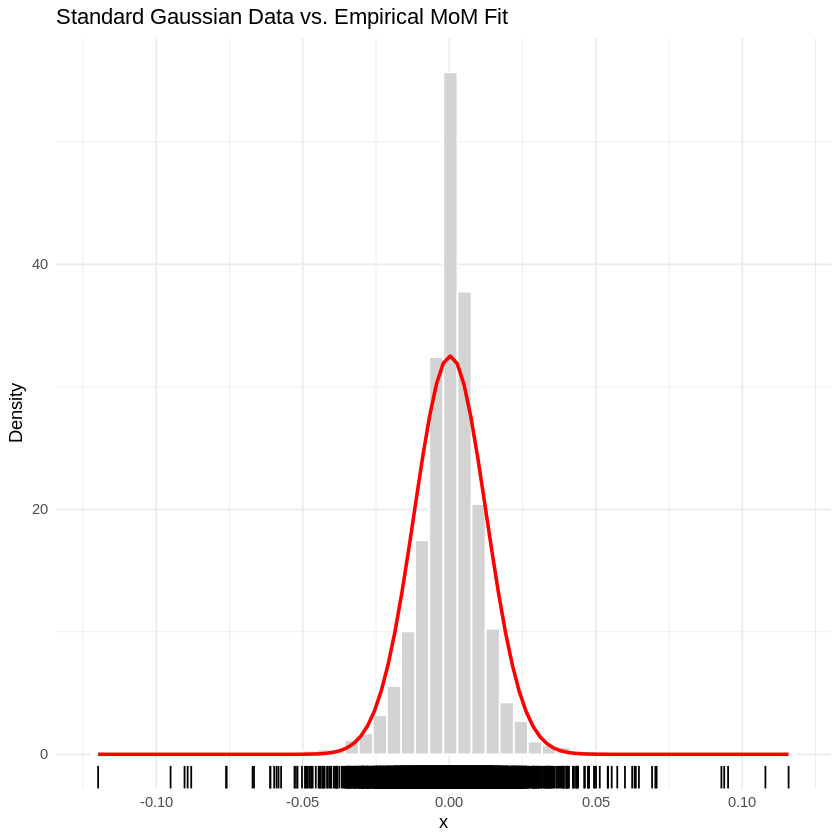

In [48]:

set.seed(1)
df =  data.frame(x = sp500_daily.returns$daily.returns)
n = nrow(df)
mean_est = mean(df$x)
var_est = var(df$x)*(n-1)/n

df %>%
  ggplot(aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)), bins = 50,
                 fill = "lightgray", color = "white") +
  stat_function(fun = dnorm, #This evaluates pdf of Gaussian with the specified mean and sd and overlays a line curve on top of the existing one
                args = list(mean = mean_est, sd = sqrt(var_est)),
                color = "red", size = 1) +
  labs(title = "Standard Gaussian Data vs. Empirical MoM Fit",
       x = "x", y = "Density") +
  geom_rug()+  #What is geom_rug()?
  theme_minimal()



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>

#### **Question 2**

The following questions are based on the `episodes` dataset. While you are expected to use R to compute the answers, the underlying concepts are identical to those in pen-and-paper confidence interval calculations.

In [4]:
episodes = read.csv("./datasets/episodes.csv")
episodes %>% str()

'data.frame':	704 obs. of  57 variables:
 $ Series                        : chr  "TOS" "TOS" "TOS" "TOS" ...
 $ Series.Name                   : chr  "The Original Series" "The Original Series" "The Original Series" "The Original Series" ...
 $ Season                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Episode                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ IMDB.Ranking                  : num  7.3 7.2 7.8 8 7.8 6.9 7.6 7.1 7.5 8.2 ...
 $ Title                         : chr  "The Man Trap" "Charlie X" "Where No Man Has Gone Before" "The Naked Time" ...
 $ Star.date                     : chr  "1513.1" "1533.6" "1312.4" "1704.2" ...
 $ Air.date                      : chr  "8/9/66" "15/9/66" "22/9/66" "29/9/66" ...
 $ Bechdel.Wallace.Test          : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Director                      : chr  "Marc Daniels" "Lawrence Dobkin" "James Goldstone" "Marc Daniels" ...
 $ Writer.1                      : chr  "George Clayton Johnson" "Gene Rode



**Note**: While these series have ended and you technically have the full “population” of some values (e.g., results of the Bechdel-Wallace test), we still ask you to compute a confidence interval for the unknown $p$. This may seem counter-intuitive, but you can think of it as follows:

- The episode test results are treated as realisations from an unknown probability distribution $f$ (here, Bernoulli(p)).
- Although the episodes are released, we are interested in the underlying process that generates these values. This includes not-yet-released episodes or hypothetical similar episodes — the confidence interval captures uncertainty about $p$ in this larger “generative model.”

This provides a foundation for future techniques, such as hypothesis testing, where we may want to assess whether the difference between two proportions is statistically significant or simply due to random variation. Simply comparing the “complete” populations of Bechdel test results for two series is not sufficient; instead, we rely on a statistical model to quantify uncertainty.

**Hint**: After using `summarise()`, use `pull()` to extract each summary statistic. Below is a toy example.

In [ ]:
set.seed(1)
df = data.frame(X = rnorm(10^4))

df %>%
  summarise(meanX = mean(X),
            varX = var(X)) -> summary_stats

summary_stats %>% pull(meanX) -> meanX #Extracting `meanX`, which can be assigned to another variable
meanX
summary_stats %>% pull(varX)


##### **Question 2.1**

Write R code to find the 90% confidence interval for the mean of the `IMDB.Ranking` for Star Trek (The Original Series). Interpret the results for a non-statistician stakeholder.

In [5]:
# a = 1 - 0.9 = 0.1
# Confidence Interval - xbar +- Z_a/2 * SE
episodes %>%
  filter(Series == "TOS") %>%
  summarise(xbar = mean(IMDB.Ranking), SE = sd(IMDB.Ranking)/sqrt(n())) -> statistics

xbar = pull(statistics, xbar)
Zscore = qnorm(0.05)
SE = pull(statistics, SE)

interval1 = xbar + (Zscore*SE)
interval2 = xbar - (Zscore*SE)

interval1
interval2

[1] 7.388426

[1] 7.684074



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!
</details>






##### **Question 2.2**

Write R code to find the 95% confidence interval for the difference of the mean `IMDB.Ranking` for Star Trek (The Original Series) and Star Trek: The Next Generation. Interpret the results for a non-statistician stakeholder.

In [13]:
# a = 1 - 0.95 = 0.05, a/2 = 0.025
# confidence interval - xbar +- Zscore * SE

episodes %>%
  filter(Series == "TOS") %>%
  summarise(xbar = mean(IMDB.Ranking), std_dev = sd(IMDB.Ranking), n = n()) -> TOSsummary

episodes %>%
  filter(Series == "TNG") %>%
  summarise(xbar = mean(IMDB.Ranking), std_dev = sd(IMDB.Ranking), n = n()) -> TNGsummary

Zscore = qnorm(0.025)
SE = sqrt((TOSsummary$std_dev^2 / TOSsummary$n) + (TNGsummary$std_dev^2 / TNGsummary$n))

(TOSsummary$xbar - TNGsummary$xbar) + (Zscore * SE)
(TOSsummary$xbar - TNGsummary$xbar) - (Zscore * SE)


[1] -0.1324632

[1] 0.3094575



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!


</details>






##### **Question 2.3**

Write R code to find the 99% confidence interval for the proportion of Star Trek: The Next Generation episodes that pass the Bechdel-Wallace Test. Interpret the results for a non-statistician stakeholder.

**Note that this is not a statistical test!**

> The Bechdel-Wallace Test assesses female representation in fiction by checking if a work features at least two named women who have a conversation about something other than a man.

Source: [Bechdel test - Wikipedia](https://en.wikipedia.org/wiki/Bechdel_test).

In [18]:
episodes %>%
  filter(Series == "TNG") %>%
  summarise(phat = mean(Bechdel.Wallace.Test), n = n()) -> statistics

phat = pull(statistics, phat)
n = pull(statistics, n)
Zscore = qnorm(0.005)
SE = sqrt(phat*(1-phat)/n)

phat + Zscore * SE
phat - Zscore * SE

[1] 0.3424091

[1] 0.5339954



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!


</details>






##### **Question 2.4**

Write R code to find the 95% confidence interval for the difference in proportions of episodes that pass the Bechdel-Wallace test between Star Trek: The Next Generation and Star Trek: Voyager. Interpret the results for a non-statistician stakeholder.

In [22]:

episodes %>%
  filter(Series == "TNG") %>%
  summarise(phat = mean(Bechdel.Wallace.Test), n = n()) -> TNGsummary

episodes %>%
  filter(Series == "VOY") %>%
  summarise(phat = mean(Bechdel.Wallace.Test), n = n()) -> VOYsummary

SE = sqrt((TNGsummary$phat*(1-TNGsummary$phat)/TNGsummary$n) + (VOYsummary$phat*(1-VOYsummary$phat)/VOYsummary$n))
Zscore = qnorm(0.025)

(TNGsummary$phat - VOYsummary$phat) + Zscore * SE
(TNGsummary$phat - VOYsummary$phat) - Zscore * SE

[1] -0.4957521

[1] -0.3138899



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!

</details>




#### **Question 3**

The following data are assumed to be generated from an exponential distribution with rate parameter $\lambda$.

Derive the MLE for $\lambda$, compute the estimate for the given sample, and check the validity  of the estimate (if the second derivative is negative).


$L(θ|x_1, x_2, ... x_n) = \prod_{i=0}^{n} f(x_i)$

.

$L(\lambda|x_1, x_2, ... x_n) = \prod_{i=0}^{n} \lambda e^{-\lambda x_i}$

$L(\lambda|x_1, x_2, ... x_n) = \lambda^n e^{-\lambda \sum_{i=0}^{n}x_i}$

.

$l(\lambda|x_1, x_2, ... x_n) = nln(\lambda) - \lambda \sum_{i=0}^{n}x_iln(e)$

$\frac{d}{d\lambda}l(\lambda|x_1, x_2, ... x_n) = \frac{n}{\lambda} - \sum_{i=0}^{n}x_i$

$0 = \frac{n}{\lambda} - \sum_{i=0}^{n}x_i$

$\hat{\lambda} = \frac{n}{\sum_{i=0}^{n}x_i}$

In [28]:
smpl_data = c(0.28, 0.34, 0.47, 1.41, 0.36, 0.75, 0.13, 0.18, 7.36, 0.46, 0.42, 2.83, 2.76, 2.31, 2.96)

n = length(smpl_data)

n/sum(smpl_data)

[1] 0.6516073



<details>
<summary>▶️ Click to show the solution</summary>

Solution will be released at the end of the week!

</details>
